In [2]:
import os
import shutil

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from random import randint

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D, AvgPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras as keras
from keras.utils import to_categorical
     

In [3]:

!wget http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
!unzip -q mrlEyes_2018_01.zip
     

--2023-03-24 22:57:51--  http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
Resolving mrl.cs.vsb.cz (mrl.cs.vsb.cz)... 158.196.141.22
Connecting to mrl.cs.vsb.cz (mrl.cs.vsb.cz)|158.196.141.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341866898 (326M) [application/zip]
Saving to: ‘mrlEyes_2018_01.zip’

mrlEyes_2018_01.zip 100%[===================>] 326.03M  7.10MB/s    in 47s     

2023-03-24 22:58:41 (6.92 MB/s) - ‘mrlEyes_2018_01.zip’ saved [341866898/341866898]



In [4]:
# Define the path to the directory where the files were extracted
directory = '/content/mrlEyes_2018_01'

# Define the path to the "dataset" folder
dataset_dir = '/content/dataset'

# Create new folders named "open", "closed", and "invalid" inside the "dataset" folder
os.makedirs(os.path.join(dataset_dir, 'open'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'closed'), exist_ok=True)
#os.makedirs(os.path.join(dataset_dir, 'invalid'), exist_ok=True)

# Loop through all files in the directory
for folder in os.listdir(directory):
    # Get the path to the current folder
    folder_path = os.path.join(directory, folder)

    # Check if the current item in the directory is a folder
    if os.path.isdir(folder_path):
        # Loop through all files in the folder
        for filename in os.listdir(folder_path):
            # Check if the file is a PNG image
            if filename.endswith(".png"):
                # Get the 16th character of the filename
                label = filename[16]

                # Determine if the image is open or closed
                if label == "0":
                    # Move the file to the "closed" folder
                    src_path = os.path.join(folder_path, filename)
                    dst_path = os.path.join(dataset_dir, 'closed', filename)
                    shutil.move(src_path, dst_path)
                elif label == "1":
                    # Move the file to the "open" folder
                    src_path = os.path.join(folder_path, filename)
                    dst_path = os.path.join(dataset_dir, 'open', filename)
                    shutil.move(src_path, dst_path)

In [5]:
# Define the path to the "closed" folder
closed_folder = '/content/dataset/closed'

# Count the total number of PNG files in the "closed" folder
num_png_files = len([f for f in os.listdir(closed_folder) if f.endswith('.png')])

# Print the total number of PNG files in the "closed" folder
print("Total number of PNG files in 'closed' folder:", num_png_files)
     

Total number of PNG files in 'closed' folder: 41946


In [6]:
# Define the path to the "open" folder
open_folder = '/content/dataset/open'

# Count the total number of PNG files in the "open" folder
num_png_files = len([f for f in os.listdir(open_folder) if f.endswith('.png')])

# Print the total number of PNG files in the "open" folder
print("Total number of PNG files in open' folder:", num_png_files)

Total number of PNG files in open' folder: 42952


In [7]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("dataset", shuffle="True",image_size= (IMAGE_SIZE,IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 84898 files belonging to 2 classes.


In [9]:
len(dataset)

2654

In [10]:
class_names = dataset.class_names
class_names

['closed', 'open']

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


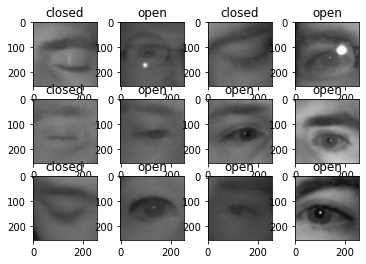

In [11]:
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    print(image_batch[i].shape)

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)


2123

In [15]:
len(val_ds)

265

In [16]:
len(test_ds)

266

In [17]:
# #commenting this out as we can't use it for splitting correctly yet
# #train_datagen = ImageDataGenerator(validation_split=0.2)

# #train_generator = train_datagen.flow_from_directory(directory = "dataset", 
# #                                                     target_size=(32,32),
# #                                                     batch_size=32,
# #                                                     shuffle=True,
#                                                      class_mode='categorical',
#                                                      subset='training')

# validation_datagen = ImageDataGenerator(validation_split=0.2)
# validation_generator =  validation_datagen.flow_from_directory(directory = "dataset", 
#                                                                 target_size=(32,32),
#                                                                 batch_size=32,
#                                                                 class_mode='categorical',
#                                                                 subset='validation')  

In [ ]:
#train_generator.class_indices

In [18]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [21]:
model.compile(
    optimizer='adam',
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    loss = 'mse',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=1,
)

2123/2123 [==============================] - 80s 24ms/step - loss: 0.2500 - accuracy: 0.4834 - val_loss: 0.2500 - val_accuracy: 0.4817
